<a href="https://colab.research.google.com/github/babinash/EDA_Project_HBA/blob/main/EDA_Submission_HBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The aim of this project is to perform Exploratory Data Analysis(EDA) on a hotel booking dataset in order to gain insights into customer behaviour and booking patterns.

Data consists the different column wise explanation of the following variables described as Hotel : List of hotels, Country : Country of origin of customer .

Distribution Channel:It tells us about the source through which booking was done (e.g Corporate,Direct,Undefined ,TA/TO,GDS)

Lead Time : Time interval between reservation and actual arrival of the customers.

Meal:This variable tells the different types of meals preffered by customer .

Market Segment : This variable specifies the purpose of visit of the customers .

Deposite Type : It signifies the different types of deposits made by customer .

Customer Type : Types of customer (transient ,group,transient-party , contract )

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/babinash/EDA_Project_HBA

# **Problem Statement**


**Write Problem Statement Here.**

Have you ever wondered when is the best time of year to book a hotel room ?

Or the optimal length of stay in order to get the best daily rate?

What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?



#### **Define Your Business Objective?**

Answer Here.

The hotel management wants to optimize their booking process and improve customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS
import os

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/hotelbookings.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head() #viewing first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail() # viewing last 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

df.shape

(119390, 32)

### Dataset Information

In [6]:
# Dataset Info

df.info() # overview of data with column values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe() #This function  gives numerical information

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df = df.copy() #Creating a copy of original data with the required columns and it helps in maintaining the original dataframe

Renaming the 'adr' column name to 'Average_daily_rate' for understanding the data well.

In [10]:
df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)

In [11]:
df.describe() #This function  gives numerical information

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
df.isna().sum().sort_values(ascending =False)[:6] # gives the count of null values in first 6 column

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

As we saw there are null values in columns(agent, children,company,country). we are replacing missing values.

In [14]:
#Replacing null values
df['children'].fillna(df.children.mean(), inplace = True) # filling null values with the mean of children column
df['children'] = df['children'].astype(int)    #converting the data type of children column to int
df['company'].fillna(0 , inplace = True)             # filling null values with 0 for company column
df['company'].astype(int)                            #converting the data type of company column to int
df['agent'].fillna(0 , inplace = True)               # filling null values with 0 for agent column
df['agent'].astype(int)                               #converting the data type of agent column to int
df['country'].fillna('Other',inplace = True)

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count

value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  31994


In [16]:
# Dataset Duplicate Value Count
df[df.duplicated()].shape #There are 31994 Duplicate rows

(31994, 32)

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
Average_daily_rate          

<Axes: >

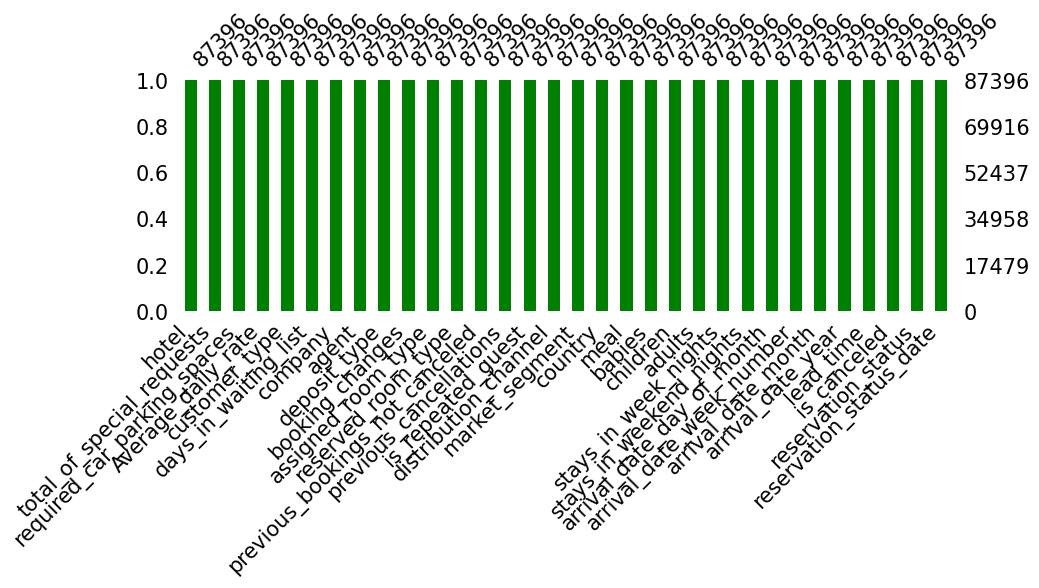

In [20]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### What did you know about your dataset?

Answer Here

We see that there are 32 columns in the dataframe . There are some rows with total number of adults, children and babies equal to zero. So we will remove such rows.

In [22]:
df[df.adults + df.babies + df.children == 0].shape

(166, 32)

In [23]:
df.drop(df[df.adults + df.babies + df.children == 0].index, inplace = True)
 #Removing rows where total is 0

In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'Average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [26]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

Answer Here

hotel: Type of hotel (categorical: 'Resort Hotel' or 'City Hotel'). is_canceled: Binary variable indicating if the booking was canceled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival.

arrival_date_month: Month of arrival.

arrival_date_week_number: Week number of arrival.

arrival_date_day_of_month: Day of the month of arrival.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) stayed.

stays_in_week_nights: Number of weekday nights stayed.

adults: Number of adults in the booking.

children: Number of children in the booking.

babies: Number of babies in the booking.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary variable indicating if the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous bookings that were canceled by the guest.

previous_bookings_not_canceled: Number of previous bookings not canceled by the guest.

reserved_room_type: Reserved room type.

assigned_room_type: Assigned room type.

booking_changes: Number of changes made to the booking.

deposit_type: Type of deposit made for the booking.

agent: ID of the travel agency that made the booking.

company: ID of the company that made the booking.

days_in_waiting_list: Number of days the booking was in the waiting list before confirmed.

customer_type: Type of booking (Transient, Contract, Group, or Transient-Party).

adr: Average Daily Rate, calculated as the sum of all room nights divided by the total number of nights.

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made by the guest.

reservation_status: Reservation status (canceled, checked-in, or no-show).

reservation_status_date: Date when the reservation status was last updated.

### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in hotel is 2
No. of unique values in is_canceled is 2
No. of unique values in lead_time is 479
No. of unique values in arrival_date_year is 3
No. of unique values in arrival_date_month is 12
No. of unique values in arrival_date_week_number is 53
No. of unique values in arrival_date_day_of_month is 31
No. of unique values in stays_in_weekend_nights is 17
No. of unique values in stays_in_week_nights is 33
No. of unique values in adults is 14
No. of unique values in children is 5
No. of unique values in babies is 5
No. of unique values in meal is 5
No. of unique values in country is 178
No. of unique values in market_segment is 8
No. of unique values in distribution_channel is 5
No. of unique values in is_repeated_guest is 2
No. of unique values in previous_cancellations is 15
No. of unique values in previous_bookings_not_canceled is 73
No. of unique values in reserved_room_type is 9
No. of unique values in assigned_room_type is 11
No. of unique values in booking_cha

Removing outliers and adding some columns

Adding a column

In [28]:
df['kids'] = df.children + df.babies           #creating new columns...........
df['Full_stay'] = df.stays_in_weekend_nights + df.stays_in_week_nights

Removing an outlier from Average_daily_rate column

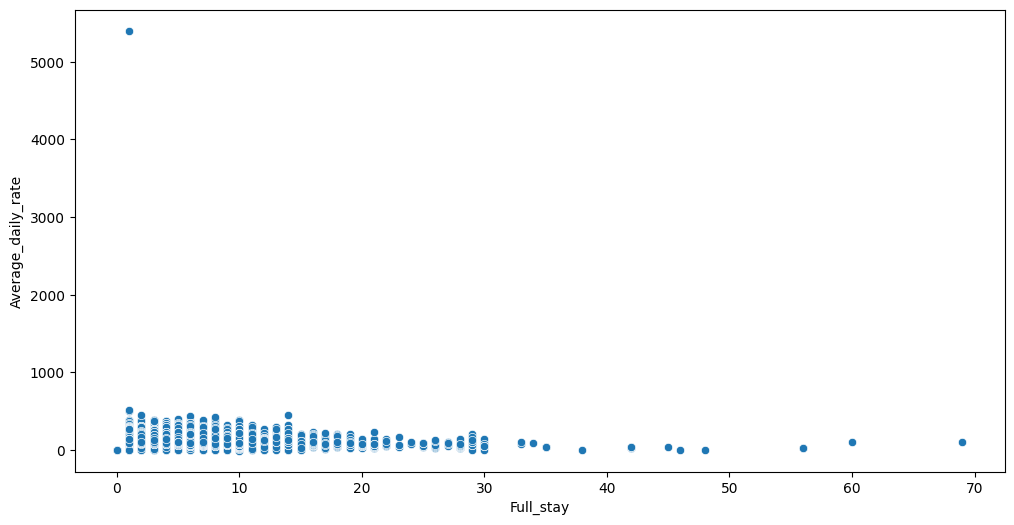

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x='Full_stay', data = df)
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Write your code to make your dataset analysis ready.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2


In [31]:
# Dataset last Look (Viewing the last 5 rows)
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,7
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0.0,0,Transient,151.20,0,2,Check-Out,2017-09-07,0,9


### What all manipulations have you done and insights you found?

Answer Here.

We are focusing on several key columns of our dataset, including 'company', 'agent', 'country', 'hotel', 'meal', and 'babies' etc, as they contain a wealth of information.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-32-352e863a9b15>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


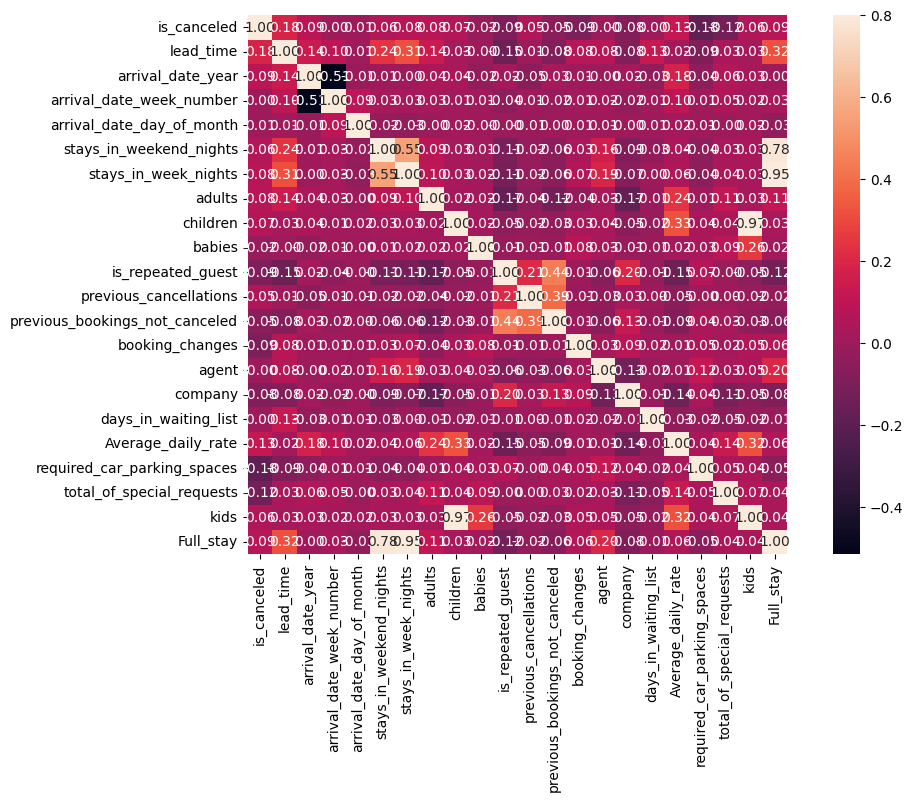

In [32]:
# Chart - 1 visualization code
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

##### 1. Why did you pick the specific chart?

Answer Here.

Heatmaps visually represent the correlation matrix of numerical attributes in a dataset. It uses color gradients to show the strength and direction of correlations between pairs of attributes.Heatmaps help in identifying relationships between variables, aiding feature selection, and understanding potential multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

Adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights from the heatmap can have a positive business impact by highlighting strong correlations that could guide decisions in product development and marketing strategies.



#### Chart - 2

<Axes: xlabel='agent', ylabel='num_of_bookings'>

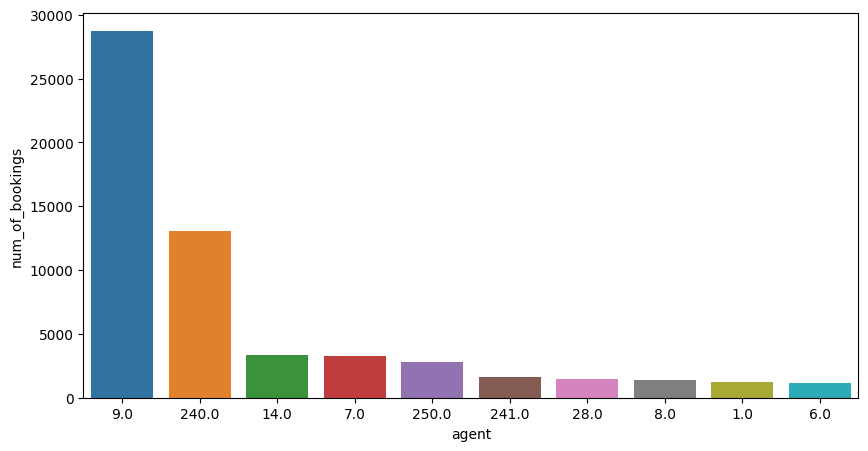

In [33]:
# Chart - 2 visualization code

d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

##### 1. Why did you pick the specific chart?

Answer Here.

In this Bar chart where the x-axis represents the agents' identifiers, and the y-axis represents the number of bookings made by each agent.

Bar charts are used to visualize categorical data and compare values across different categories. In this Python project, the chart is used to showcase the booking performance of the top agents, allowing for easy comparison of their respective booking counts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Agent no. 9 has made most no. of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights from this chart can create a positive business impact by identifying the top-performing agents. This information enables businesses to acknowledge and reward high-performing agents, potentially leading to increased motivation and productivity. It also guides resource allocation and strategic decisions based on agent performance.

#### Chart - 3

Room type is in most demand and which room type generates highest adr

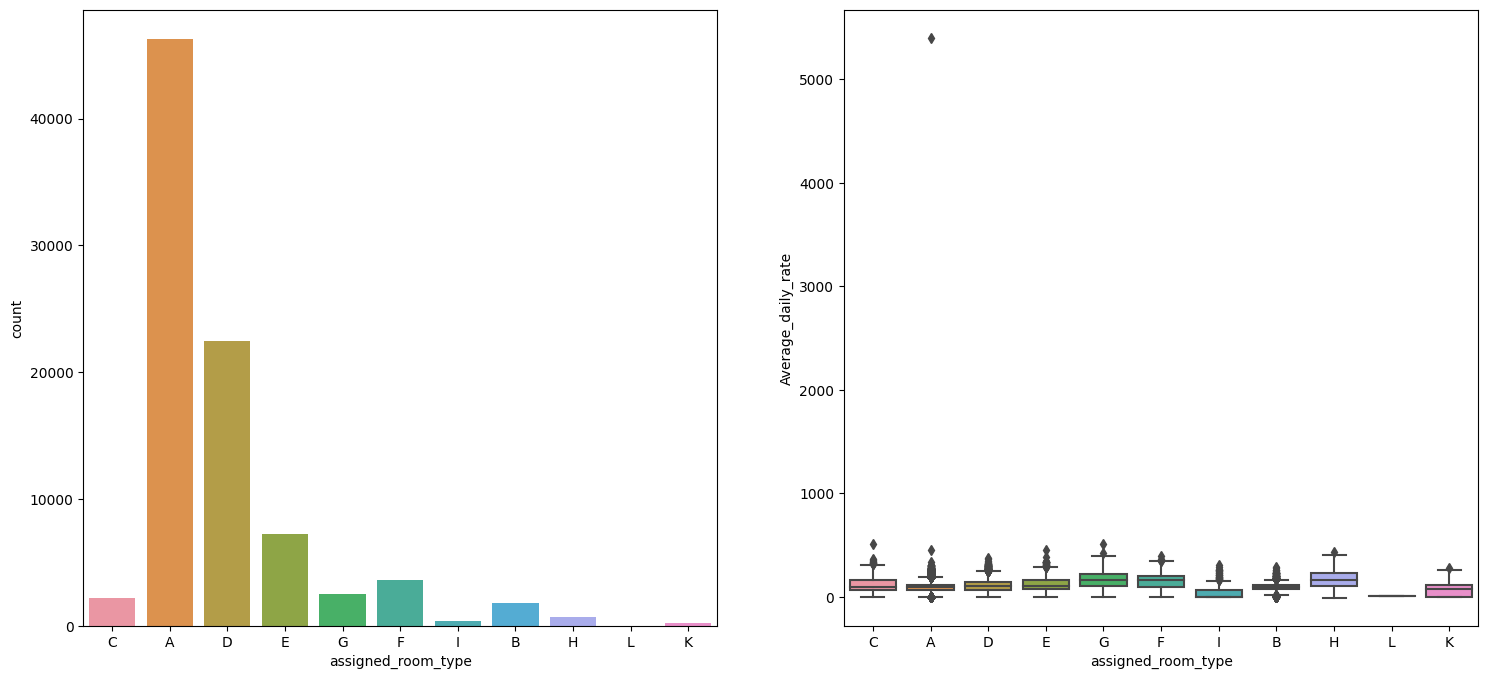

In [34]:
# Chart - 3 visualization code

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'],y = df['Average_daily_rate'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Countplot: It is used to display the distribution of categorical data by counting the occurrences of each category. In this context, it shows the distribution of room types based on the 'assigned_room_type' attribute.

Boxplot: It provides insights into the distribution of a continuous variable ('adr') across different categories ('assigned_room_type'). It shows the median, quartiles, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights can have a positive business impact by helping the hotel industry understand the popularity of different room types ('assigned_room_type') and their corresponding average daily rates ('adr'). This information can influence pricing strategies and resource allocation.

#### Chart - 4

Meal type is most preffered meal of customers

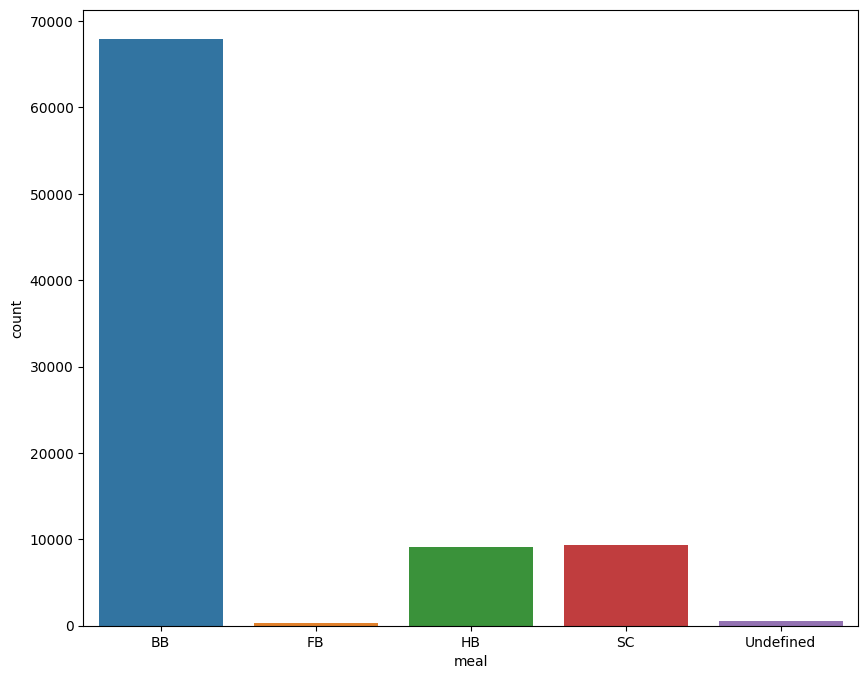

In [35]:
# Chart - 4 visualization code

plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The chart is a "countplot" in Seaborn, which displays the frequency of each category in a categorical variable, this chart is used to visualize the distribution of meal categories. The insights gained from this chart can help businesses understand the popularity of different meal types, aiding menu planning and resource allocation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most preferred meal type is BB (Bed and breakfast).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive business impacts include optimizing menu offerings. Negative growth insights might occur if certain meal types consistently have lower counts, potentially requiring adjustments to boost their appeal and prevent decline.

#### Chart - 5

# Hotel wise analysis

Percentage of bookings in each hotel

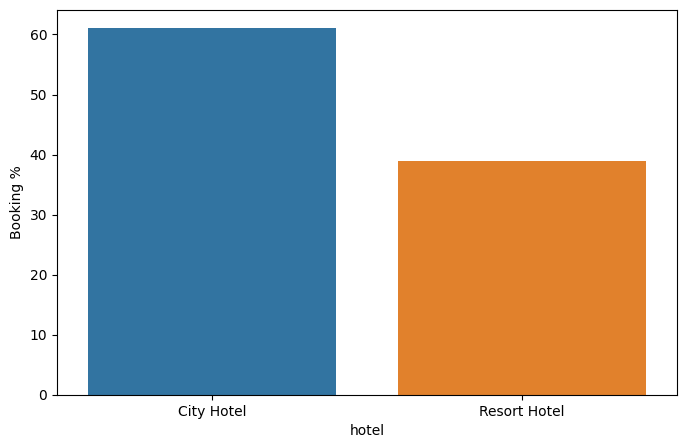

In [36]:
# Chart - 5 visualization code

grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar plot is used to visualizes the percentage distribution of bookings between different hotel types. Bar plots are useful for comparing the frequency or distribution of categorical data. The gained insights can have a positive business impact by helping hotels understand the demand for their services and adjust their strategies accordingly, possibly leading to increased bookings and revenue.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights lead to negative growth as if the insights show that one type of hotel has significantly lower booking percentages, it could indicate negative growth potential for that particular hotel category. This could prompt the need for targeted marketing, service improvement, or strategy adjustments to mitigate the negative impact and potentially improve bookings for that hotel type.

#### Chart - 6

Hotel seems to make more revenue ?

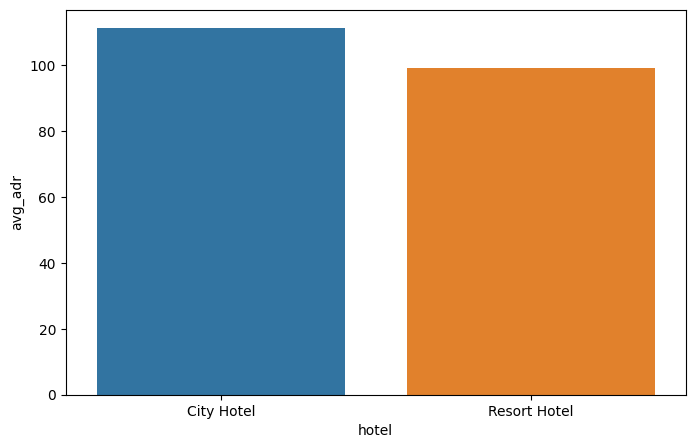

In [37]:
# Chart - 6 visualization code

d3 = grouped_by_hotel['Average_daily_rate'].agg(np.mean).reset_index().rename(columns = {'Average_daily_rate':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Hotel has higher lead time

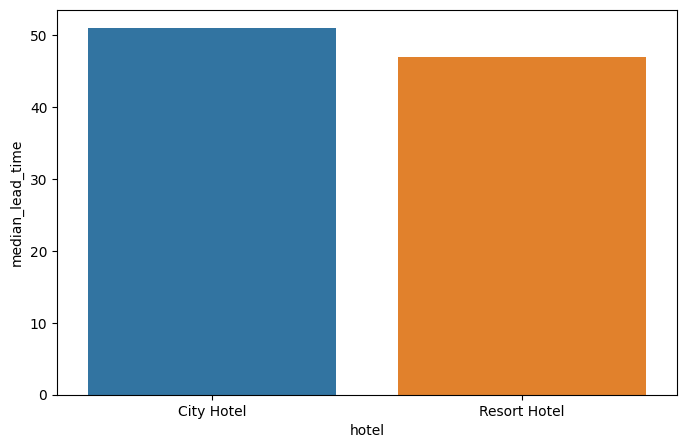

In [38]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar chart is used to visualize the average daily rate (ADR) and median lead time for different hotels. It helps compare the average ADR and median lead time between two types of hotels

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights can positively impact business decisions by identifying pricing trends and allowing hotels to adjust rates for better revenue management.

#### Chart - 7

Hotel has longer waiting time

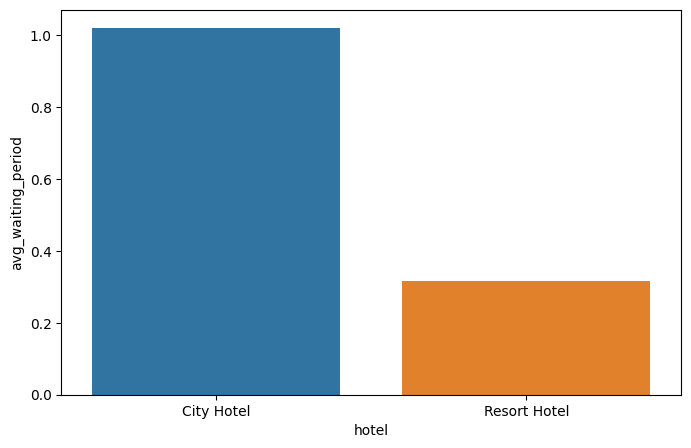

In [39]:
# Chart - 7 visualization code

d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart created using the Seaborn library in Python. It displays the average waiting period (days) for different hotels. Bar charts are used to compare categorical data and show the relationship between a categorical variable (hotels) and a numerical variable (average waiting period).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights can potentially create a positive business impact. Hotels can use this information to manage and optimize their reservation systems, reducing customer wait times and enhancing guest satisfaction.

#### Chart - 8

Hotel has higher bookings cancellation rate

In [40]:
# Chart - 8 visualization code

cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


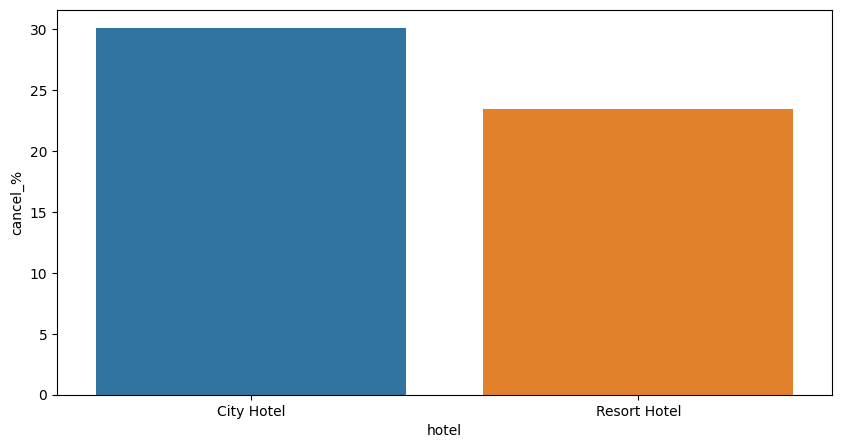

In [41]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Hotel has high chance that its customer will return for another stay

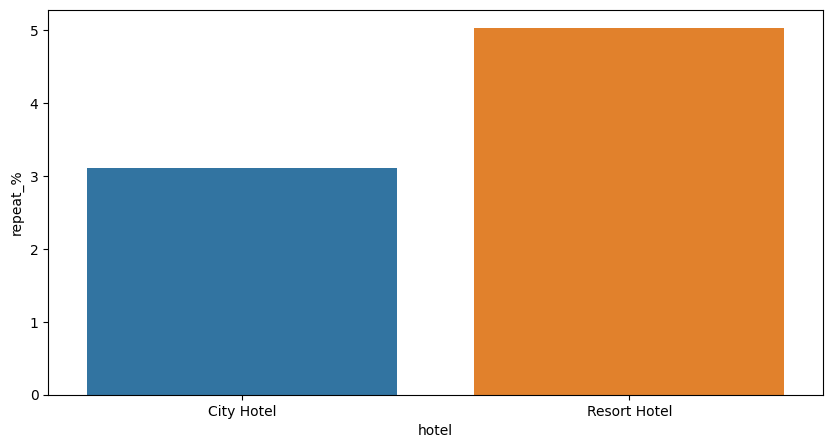

In [42]:
# Selecting and counting repeated customers bookings
repeated_data = df[df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The bar plot is used to visualize the cancellation percentage and repeat percentage for different types of hotels based on the data in the Python project.

Bar plots are commonly used for comparing and displaying categorical data. In this context, the bar plot is used to show the cancellation percentage and repeat percentage for different types of hotels, allowing easy comparison of cancellation rates and and repeat percentage between the two hotel types.

##### 2. What is/are the insight(s) found from the chart?

*Answer* Here

Almost 40 % of City Hotel bookings got canceled.

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights have a positive business impact. By visualizing the cancellation percentage for different hotel types, the project can highlight which type of hotel is experiencing higher cancellation rates. This insight can lead to targeted strategies to reduce cancellations, such as improving booking policies or enhancing guest experiences to reduce dissatisfaction.

If the bar plot reveals a significantly higher cancellation percentage for a particular type of hotel, it could indicate negative growth.

#### Chart - 9

# Distribution Channel wise Analysis

The most common channel for booking hotels

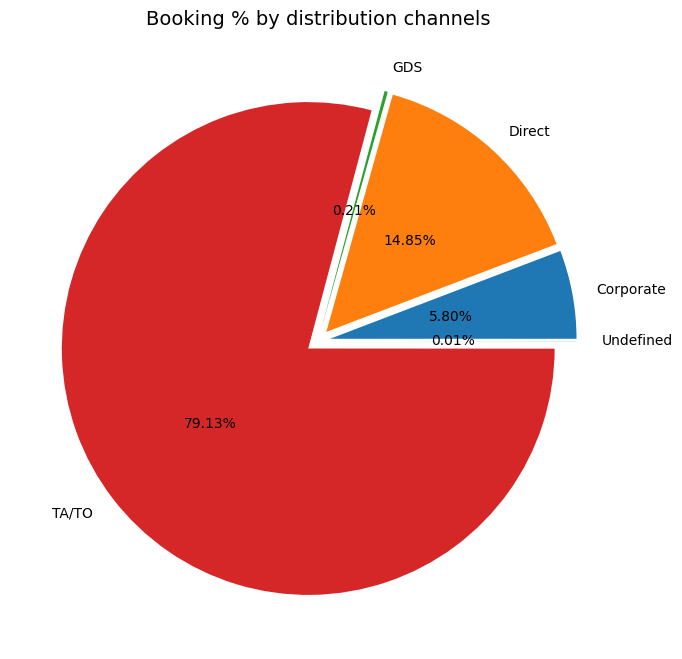

In [43]:
# Chart - 9 visualization code

group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Channel is mostly used for early booking of hotels

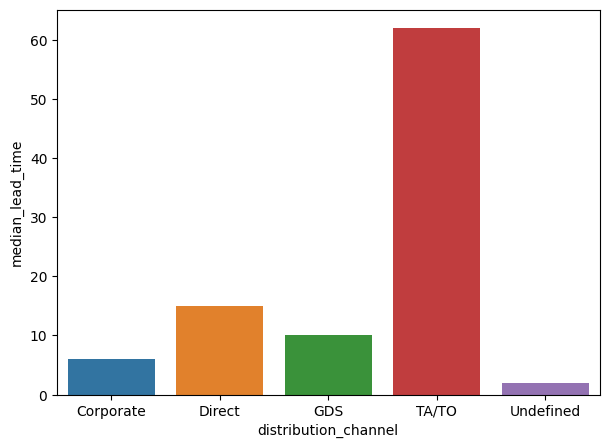

In [44]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

Channel has longer average waiting time

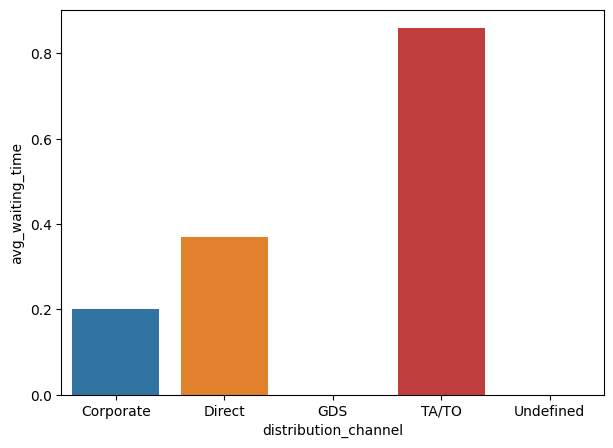

In [45]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

Distribution channel brings better revenue generating deals for hotels

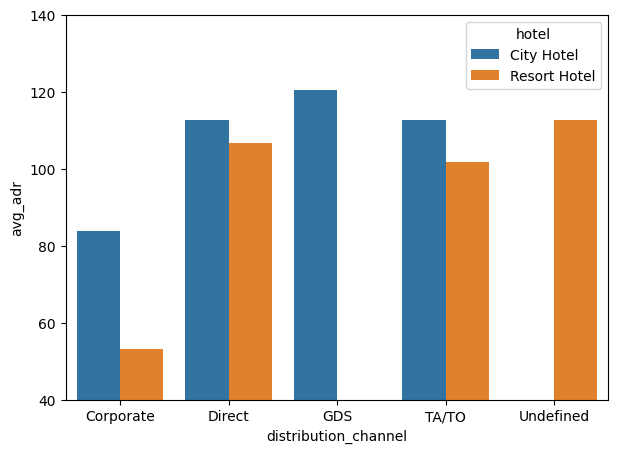

In [46]:
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['Average_daily_rate']).agg(np.mean),2)).reset_index().rename(columns = {'Average_daily_rate': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Pie Chart, which is used to visualize the distribution of booking percentages across different distribution channels. It provides a clear overview of the proportion of bookings made through each channel in relation to the total number of bookings. This chart helps to understand the contribution of each distribution channel to the overall bookings and assess their relative effectiveness.

Bar Chart, used to display the average waiting time for different distribution channels. It allows comparison of the average waiting time among various channels, offering insights into potential differences in service efficiency or customer preferences.

Grouped Bar Chart, showcasing the average average daily rate (ADR) across distribution channels and different types of hotels. It aids in identifying trends in pricing for different distribution channels and hotels.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from these charts can help in strategizing marketing efforts and resource allocation based on the effectiveness of distribution channels. Identifying channels with higher booking percentages and shorter waiting times can lead to better customer experiences and more targeted promotional campaigns.

#### Chart - 10

# Booking cancellation Analysis

Significant distribution channel has highest cancellation percentage

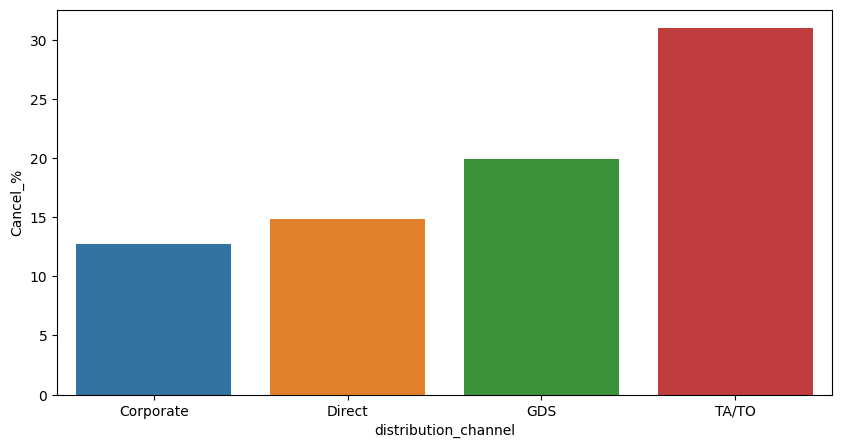

In [47]:
# Chart - 10 visualization code

d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

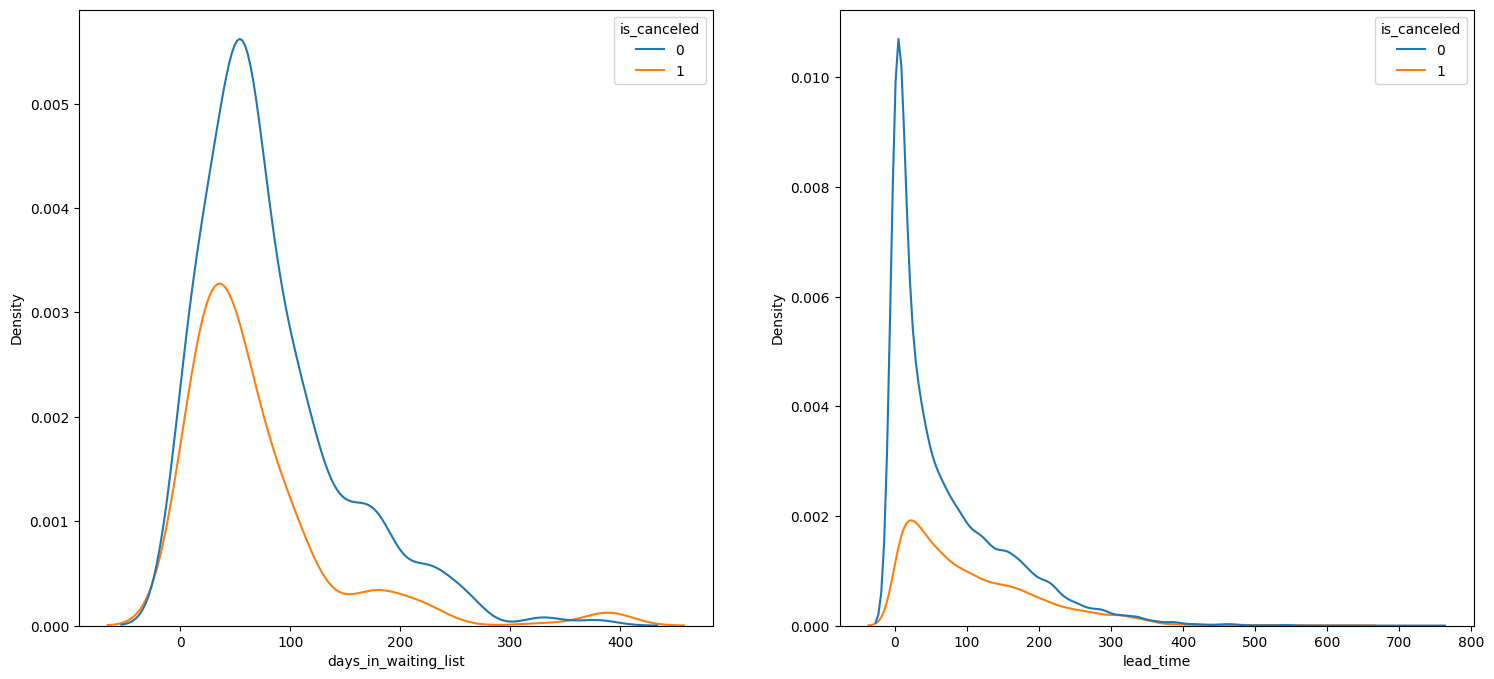

In [48]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

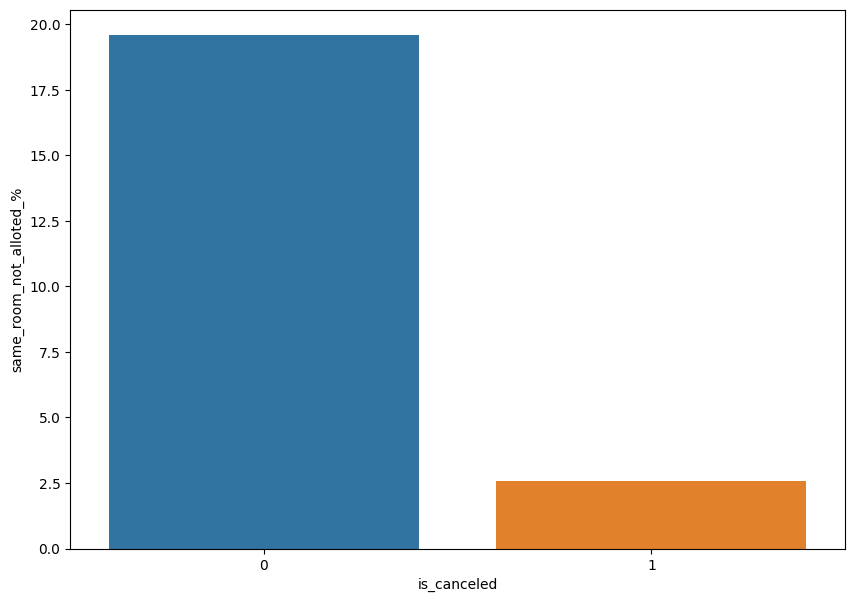

In [49]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

df['same_room_not_alloted'] = df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see does not getting same room affects the adr.

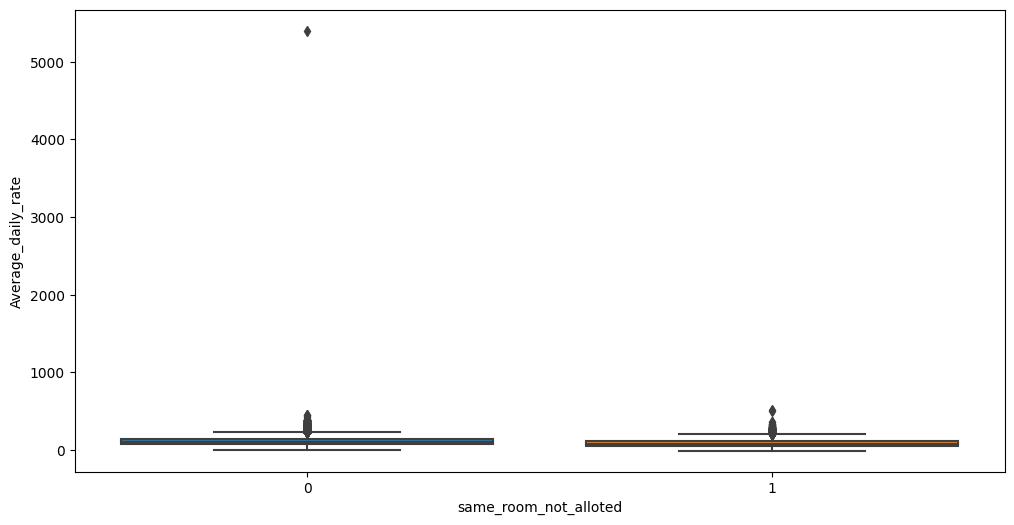

In [50]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'Average_daily_rate', data = df)
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

##### 1. Why did you pick the specific chart?

Answer Here.

The bar plot showing the percentage of cancellations for different distribution channels ('is_canceled' vs. 'distribution_channel'). It helps visualize the cancellation rates based on different distribution channels.

The second set of two KDE plots show the density distribution of 'days_in_waiting_list' and 'lead_time' attributes, segmented by the 'is_canceled' label. These plots help compare the distribution of waiting times and lead times for canceled and non-canceled bookings.

The third bar plot illustrating the percentage of cases where the reserved room type doesn't match the assigned room type ('same_room_not_alloted' vs. 'is_canceled'). It provides insights into the relationship between room allotment discrepancies and cancellations.

The box plot depicting the relationship between 'same_room_not_alloted' and 'adr' (average daily rate) values. This plot showcases the distribution of average daily rates for cases where the reserved room type is not allocated, helping identify any patterns between pricing and room allocation discrepancies.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cancelation are similar for lead time too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from these charts can have a positive business impact:

Optimized Distribution Channel Strategies: The first chart highlights distribution channels with higher cancellation rates, guiding targeted marketing efforts and channel optimization to reduce cancellations.

Effective Resource Allocation: The KDE plots expose patterns in waiting times and lead times for canceled bookings, allowing the business to allocate resources more efficiently and manage customer expectations.

However, there's a potential for negative impact:

Room Allocation Discrepancies: The third and fourth charts show that when the reserved room type isn't allocated, cancellations are more prevalent. This insight highlights a potential issue affecting customer satisfaction and operational efficiency, potentially leading to negative growth if not addressed promptly.

#### Chart - 11

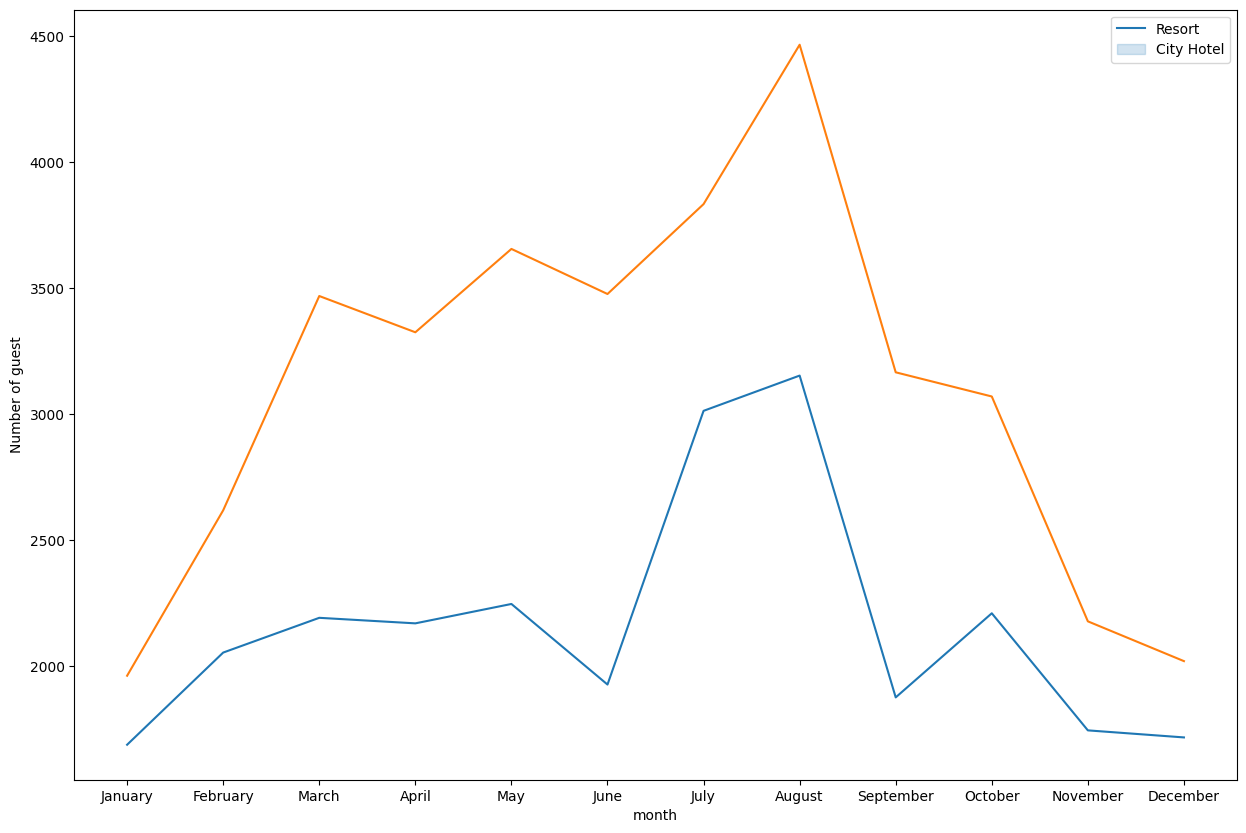

In [51]:
# Chart - 11 visualization code

#Which are the most busy months?
d_month = df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['Average_daily_rate'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['Average_daily_rate'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest
final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Month results in high revenue

In [52]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

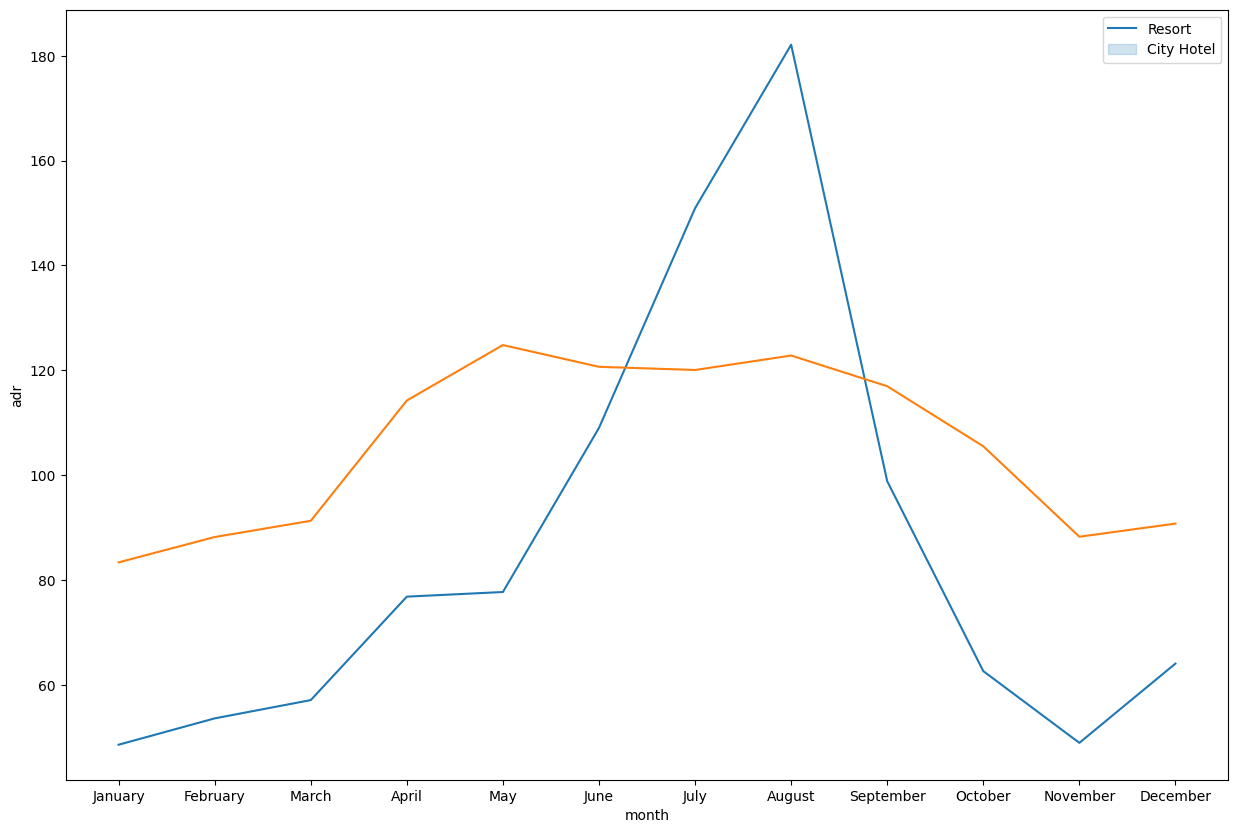

In [55]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['Average_daily_rate'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['Average_daily_rate'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

In [57]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df['arrival_date_month'], y = df['adr'])
plt.show()

KeyError: 'adr'

<Figure size 1500x800 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

Line Plots: The first set of line plots compare the number of guests between a resort hotel and a city hotel over different months. This helps visualize the variation in the number of guests for each type of hotel across the months. The second set of line plots shows the average daily rate (ADR) for both resort and city hotels over the months. These plots reveal any trends or patterns in ADR changes for the two types of hotels.

Line plots are useful for visualizing trends, patterns, and comparisons over a continuous variable (in this case, months). They are essential for conveying insights about the variation and relationships between different variables.

The gained insights about guest numbers and ADR fluctuations can guide marketing and pricing strategies. Higher guest numbers in specific months might lead to targeted promotions, and understanding ADR patterns can aid in optimizing pricing strategies.

Box Plot: The box plot shows the distribution of the average daily rate (ADR) for each month. It provides information about the central tendency, spread, and outliers in ADR across the months.

Box plots are effective for visualizing the distribution of a numerical variable and identifying potential outliers. They help in understanding the spread of data and identifying potential patterns or variations.

This visualization could indicate months with higher variability in ADR, which might require closer examination. Understanding ADR distribution can help in strategic decision-making related to pricing adjustments and resource allocation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most number of guest comes in month of August.

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from these visualizations have a positive business impact. They provide the ability to:

Plan marketing efforts during peak guest months to maximize revenue. Adjust pricing strategies based on ADR patterns to optimize profitability. Identify months with potential underperforming trends and address them proactively.

#### Chart - 12

The trend of arrival_num and avg adr within a month

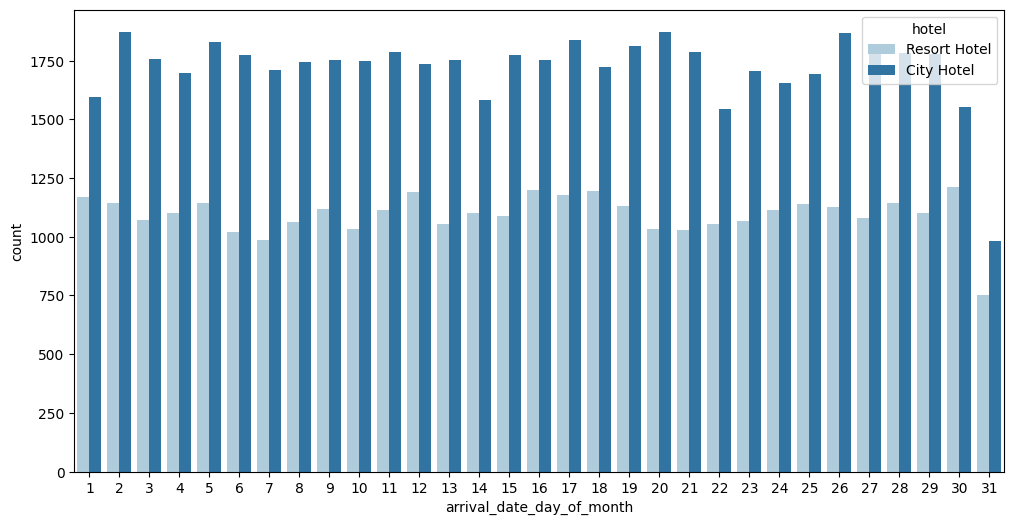

In [58]:
# Chart - 12 visualization code

plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This countplot is useful for visualizing the distribution of categorical data, especially when we want to compare the distribution of two categories different types of hotels within each category of another variable the day of the month of arrival. It helps you understand how the counts vary across different categories and allows you to make comparisons between them easily.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

we can see less no. of arrivals are at the month end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insights from these charts create a positive business impact. For instance, identifying the trend of arrival_num and avg adr within a month

#### Chart - 13

Predict whether or not a hotel was likely to receive a disproportionately high number of special requests

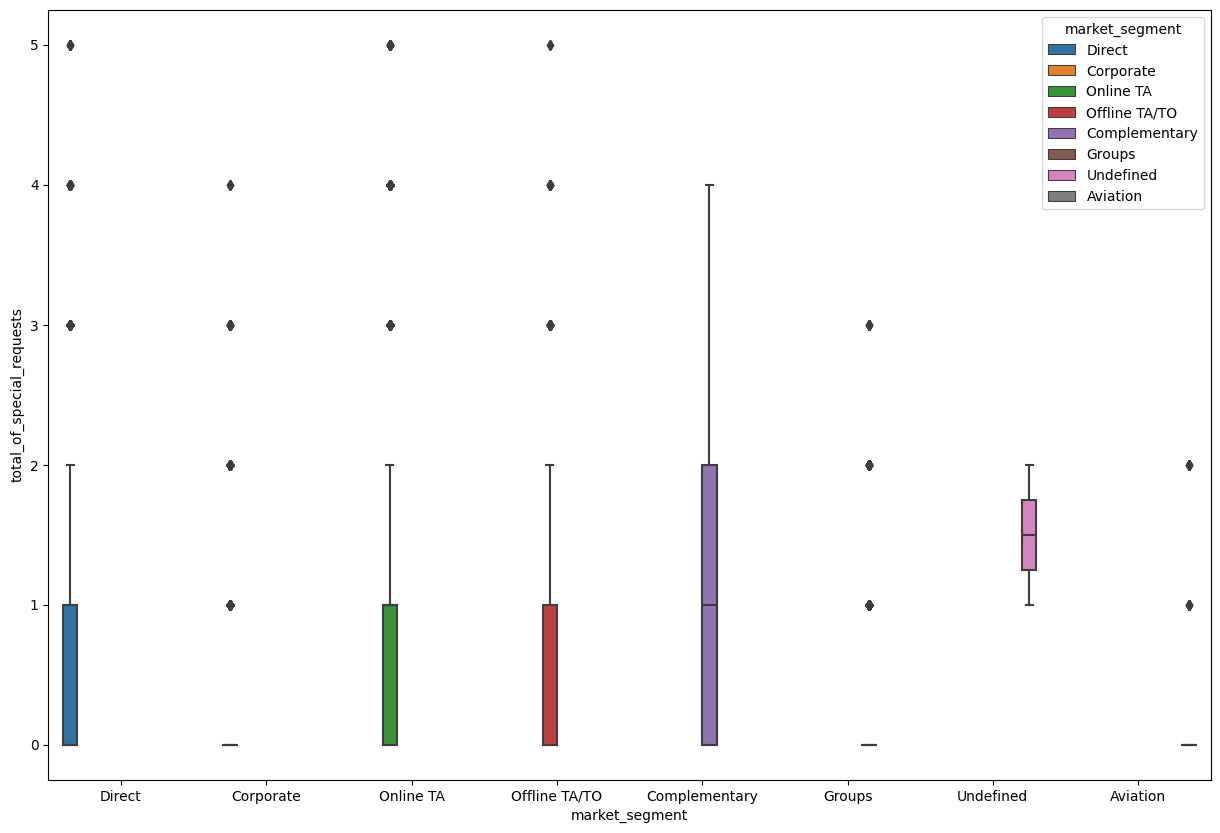

In [59]:
# Chart - 13 visualization code

#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df)

fig = plt.gcf()
fig.set_size_inches(15,10)

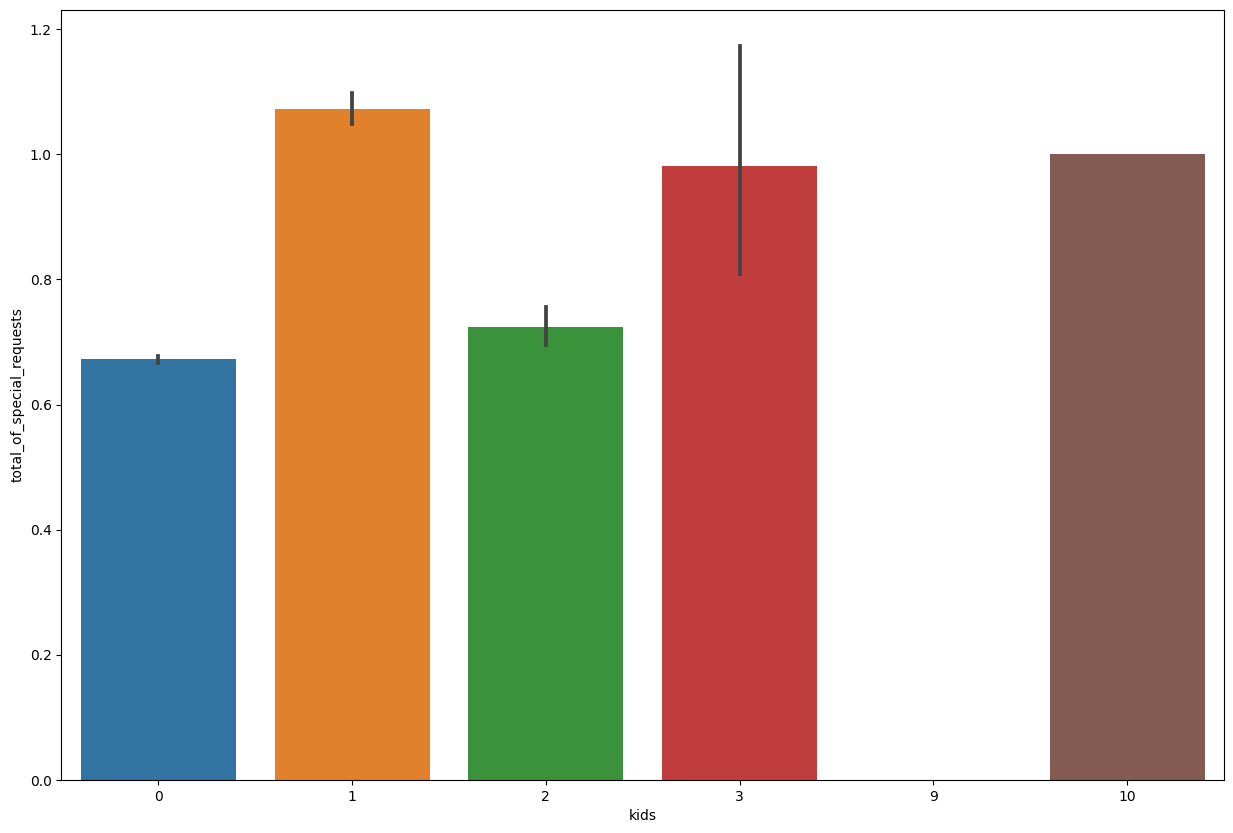

In [60]:
#Special request accoring to number of kid.
df['kids'] = df['children']+df['babies']
sns.barplot(x="kids", y="total_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(15,10)

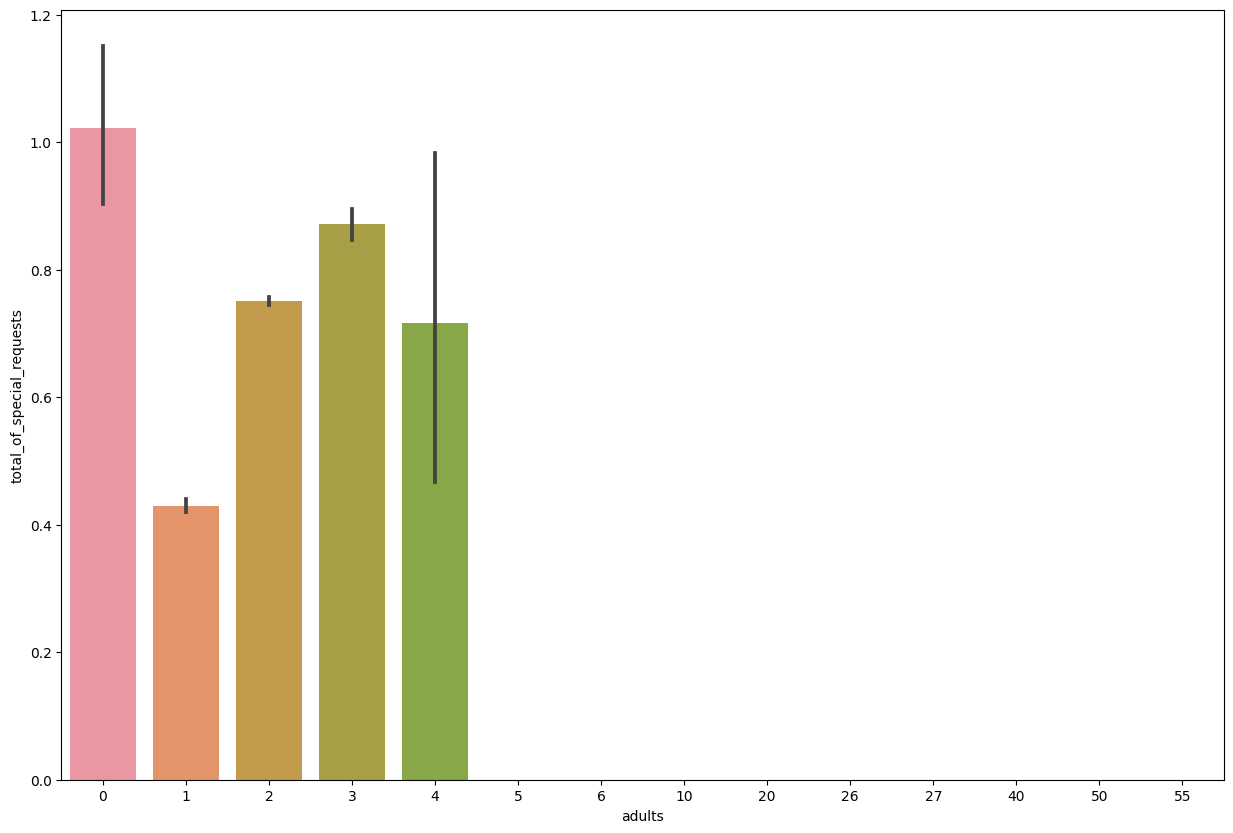

In [61]:
sns.barplot(x="adults", y="total_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(15,10)

In [62]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [63]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

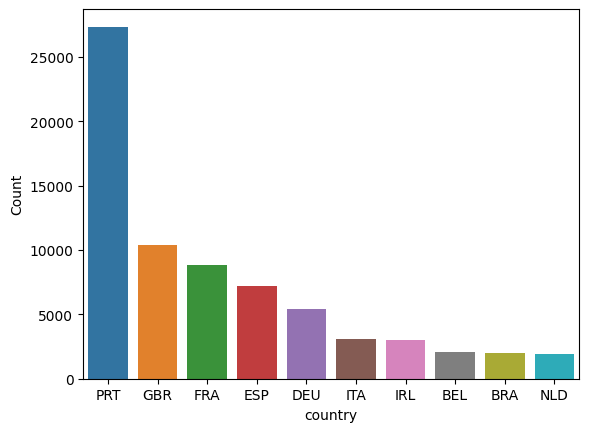

In [64]:
grouped_by_country = df.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Box Plot that shows the distribution of the "total_of_special_requests" variable across different "market_segment" categories. It helps identify variations and outliers within each market segment. Such visualizations are useful for understanding data distribution and identifying patterns or anomalies.

Bar Plots show relationships between different variables. The chart displays the relationship between the sum of "children" and "babies" (combined as "kids") and the "total_of_special_requests". The third chart demonstrates the relationship between the number of "adults" and "total_of_special_requests". Both bar plots provide insights into how different guest compositions influence special requests.

The choropleth map that uses geographical data to display the number of guests per country. This type of map helps visualize the distribution of guests across different countries. The map is generated using the Folium and Plotly libraries.

Bar Plot showcases a bar plot representing the top 10 countries with the highest guest counts. This visualization provides a quick overview of the most common countries of origin for guests.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

All of market segment mostly have special request.

Most guest are from Portugal and other Europian contries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Insights gained from these visualizations lead to a positive business impact. Understanding guest preferences and behavior patterns can aid in tailoring marketing strategies, optimizing guest experiences, and enhancing service offerings. For instance, identifying countries with higher guest counts might suggest focusing marketing efforts on those regions.

#### Chart - 14 - Correlation Heatmap

<ipython-input-65-8f193f37a0f2>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



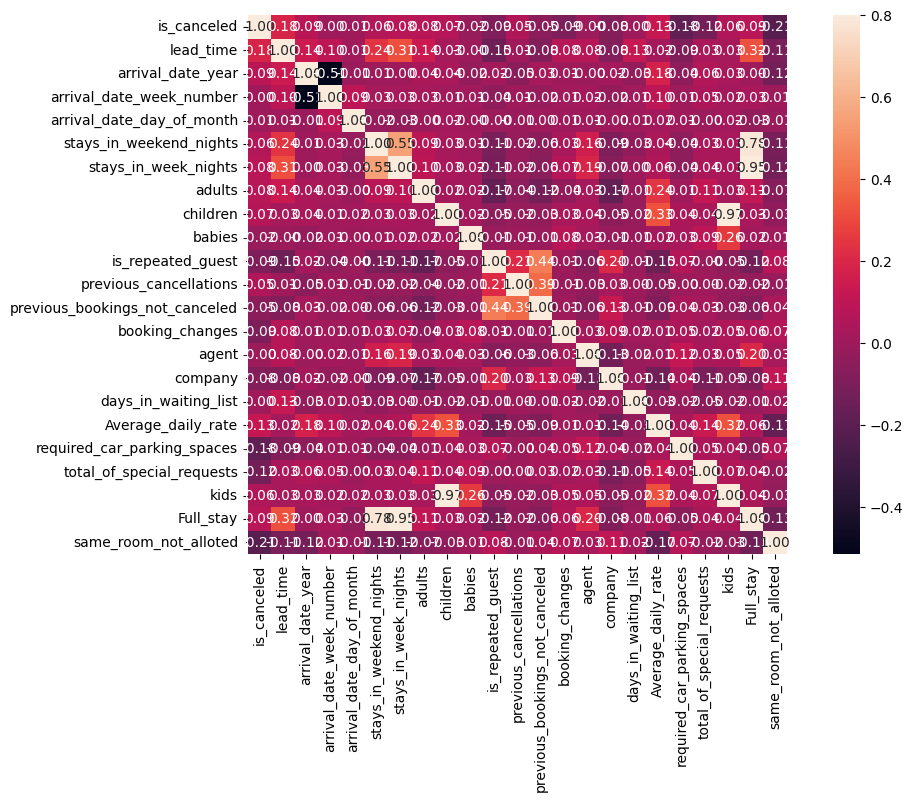

In [65]:
# Correlation Heatmap visualization code

#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

##### 1. Why did you pick the specific chart?

Answer Here.

Heatmaps visually represent the correlation matrix of numerical attributes in a dataset. It uses color gradients to show the strength and direction of correlations between pairs of attributes.Heatmaps help in identifying relationships between variables, aiding feature selection, and understanding potential multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

Adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

#### Chart - 15 - Pair Plot

How long do people stay at the hotels

In [66]:
# Pair Plot visualization code

filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,0


In [67]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-67-a6d36badedd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay,same_room_not_alloted,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,0,2


In [68]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='Number of stays'>

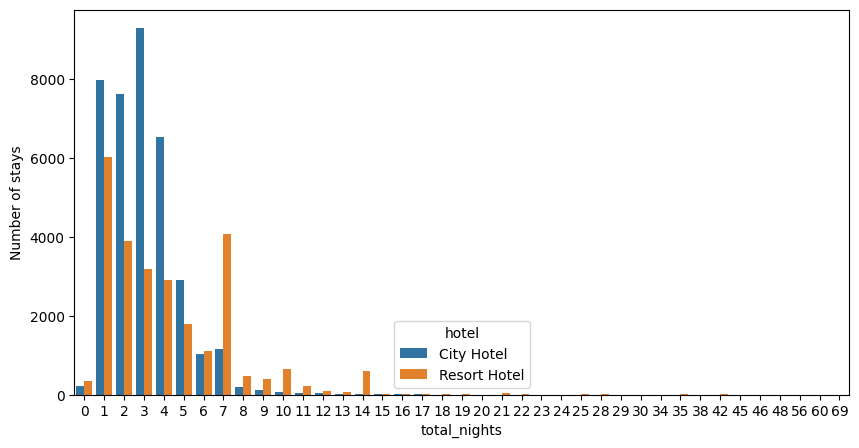

In [69]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

##### 1. Why did you pick the specific chart?

Answer Here.

The grouped bar chart visually displays the distribution of the number of stays for different total nights spent in hotels, categorized by hotel type (hues). It helps compare the distribution of stays across different hotels based on the total nights spent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most people prefer to stay at the hotels of <=5 days.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

To achieve the business objective in hotel booking analysis, we can recommend the following steps:

Demand Forecasting: Implement predictive models to forecast room demand based on historical booking patterns, events, and seasonal trends. This enables proactive resource allocation and staff planning.

Personalized Customer Experience: Utilize guest data to create tailored experiences. Leverage preferences and past behavior to offer targeted promotions, room preferences, and personalized services, enhancing guest satisfaction and loyalty.

Optimized Pricing Strategies: Apply dynamic pricing models to adjust room rates in real-time based on demand, occupancy, and market conditions. This maximizes revenue by capturing peak demand periods and attracting cost-sensitive customers during off-peak times.

Cancellation Prediction: Develop models to predict booking cancellations, allowing the hotel to optimize inventory management and minimize revenue loss through strategic overbooking or targeted incentives for non-cancellation.

Feedback Analysis: Analyze guest reviews and feedback sentiment to identify areas of improvement, enhancing service quality, and addressing issues promptly to enhance guest satisfaction.

Competitor Benchmarking: Analyze competitor performance and pricing to fine-tune offerings and stay competitive in the market, attracting more bookings and potentially capturing new market segments.

# **Conclusion**

Write the conclusion here.

In conclusion, the hotel booking analysis has unveiled valuable insights into guest special request,guest categories,distribution channel brings better revenue,channel has longer average waiting time, preferences, and market dynamics etc. By leveraging EDA and visualization capabilities, we identified booking trends, seasonal patterns, and demand fluctuations. These insights enable informed decision-making, from optimizing pricing strategies to enhancing personalized guest experiences. This is not only aids the hotel industry in resource allocation and revenue management but also paves the way for continuous improvement in guest satisfaction and operational efficiency.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***